In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [56]:
df     = pd.read_csv("data/cleaned.csv")

df = df[((df["Genre"] == "pop") | (df["Genre"] ==  "country"))]
df = df.drop(columns="Unnamed: 0")
df = df.drop_duplicates(subset=["Name","Artist"],keep=False)
df.to_csv("data/cleaned.csv")
genres = df["Genre"].unique()
unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'
]
colors = {}
i = 0
for genre in genres:
    colors[genre] = unique_colors[i]
    i+=1
colors_list = [colors[genre] for genre in genres]
df.head()

,Genre,Id,Popularity,Is_Exp,Name,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature
982,country,6ERR6e7h6wCqGoz1TjiUJb,70,False,Knockin' Boots,Luke Bryan,0.739,0.682,2,-3.728,1,0.2050,0.1290,0.0,0.328,0.634,131.983,4
984,country,7C6JnGZRj0HMIF06rlz9Mb,75,False,Make It Sweet,Old Dominion,0.539,0.859,7,-4.465,1,0.0399,0.0317,0.0,0.102,0.456,89.937,4
986,country,0bPnT6i9H1p8Vd85GS6Z7I,78,False,Night Shift,Jon Pardi,0.628,0.757,7,-3.561,1,0.0281,0.1130,0.0,0.263,0.727,96.016,4
987,country,0ME4uQYTQmovH1v9PbWqW2,73,False,Lead Me On,Teddy Robb,0.464,0.688,8,-4.553,1,0.0301,0.1060,0.0,0.146,0.411,173.793,4
988,country,698eQRku24PIYPQPHItKlA,80,False,She Got the Best of Me,Luke Combs,0.533,0.907,11,-3.793,1,0.0406,0.0292,0.0,0.386,0.700,150.990,4


In [39]:
df["Genre"].value_counts()

pop        2016
country    1000
Name: Genre, dtype: int64

In [40]:
x_cols    = ["Is_Exp","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time_Signature"]
y_cols    = ["Genre"]
meta_cols = ["Id","Popularity","Name","Artist"]

In [41]:
X,y,meta = df[x_cols],df[y_cols].iloc[:,0],df[meta_cols]

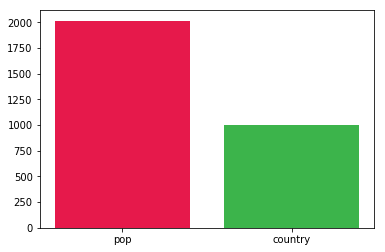

In [42]:
hist_data = dict(y.value_counts())
keys = list(hist_data.keys())
vals = list(hist_data.values())
plt.bar(keys,vals ,color=colors_list)
plt.show()

In [43]:
# plt.pie(vals,labels=keys ,colors=colors_list)
# plt.show()

In [44]:
X.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000
mean,0.624592,0.595086,5.290451,-7.529308,0.711538,0.070876,0.313838,0.022659,0.170205,0.529101,118.892593,3.950265
std,0.134150,0.200403,3.554810,3.245590,0.453122,0.073198,0.291748,0.110906,0.128544,0.230447,28.607821,0.285956
min,0.142000,0.021000,0.000000,-24.385000,0.000000,0.022800,0.000003,0.000000,0.021900,0.037600,37.399000,1.000000
25%,0.541000,0.452750,2.000000,-9.294500,0.000000,0.033100,0.055300,0.000000,0.095000,0.350000,97.082500,4.000000
50%,0.629500,0.615000,5.000000,-6.783000,1.000000,0.043750,0.217000,0.000002,0.121000,0.522000,115.915000,4.000000
75%,0.714000,0.752000,8.000000,-5.175750,1.000000,0.070900,0.543000,0.000154,0.198000,0.706000,136.191750,4.000000
max,0.966000,0.993000,11.000000,0.366000,1.000000,0.830000,0.995000,0.959000,0.948000,0.982000,213.840000,5.000000


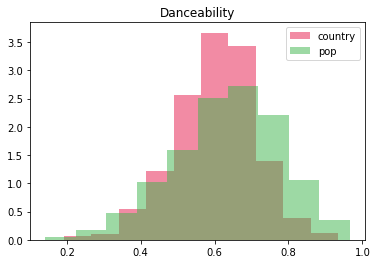

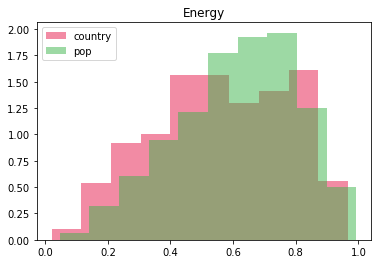

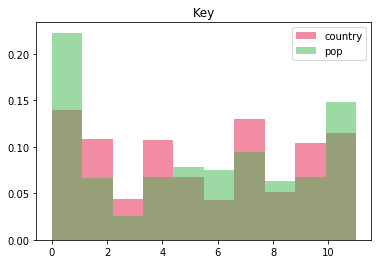

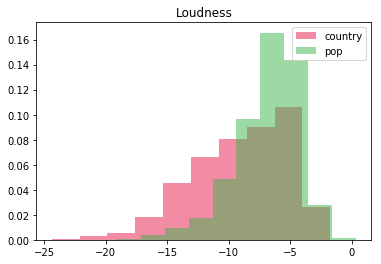

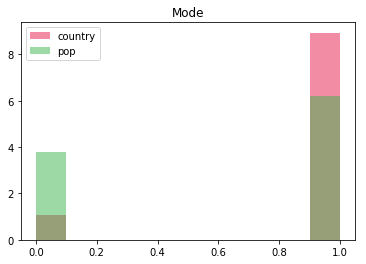

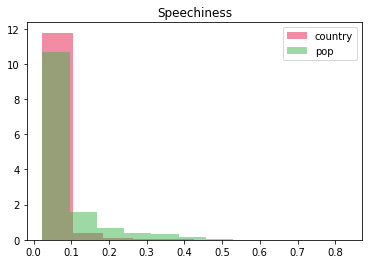

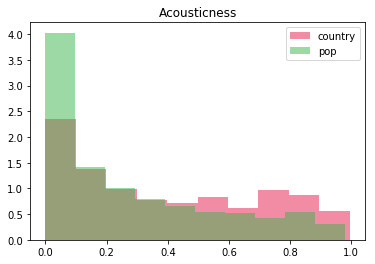

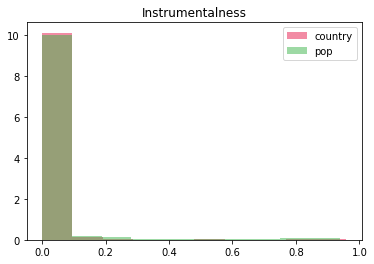

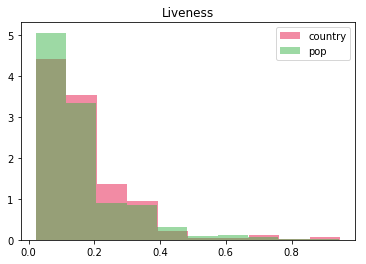

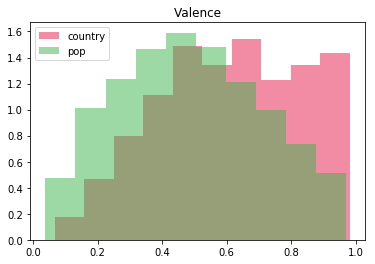

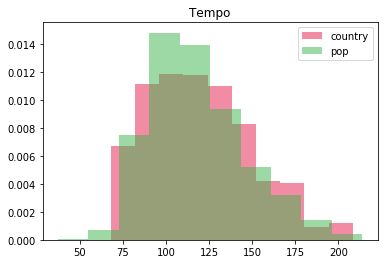

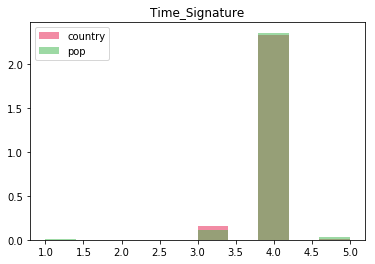

In [45]:
for label, content in X.iteritems():
    if label != "Is_Exp":
        for genre in genres:
            plt.hist(content[df["Genre"] == genre],label=genre,color=colors[genre],density=1,alpha=.5)
            plt.title(label)
        plt.legend()
        plt.show()

In [46]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2"])

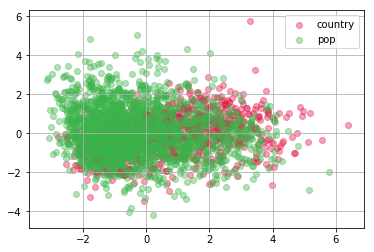

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)


for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    xs   = prin_df["PC1"][mask]
    ys   = prin_df["PC2"][mask]
    ax.scatter(xs,ys, c=color,alpha=.4)

ax.legend(genres)
ax.grid()
plt.savefig("brit_cool.png")

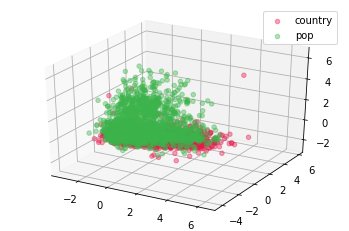

In [48]:
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2","PC3"])

# %matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    ax.scatter(prin_df["PC1"][mask], prin_df["PC2"][mask], prin_df["PC3"][mask], c=color,alpha=.4)

    
ax.legend(genres)
ax.grid()

In [49]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=.2)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression(solver="lbfgs", multi_class="ovr")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
training = clf.score(X_train, y_train)
testing  = clf.score(X_test,  y_test)
print("Training Accuracy: {}".format(training))
print("Testing  Accuracy: {}".format(testing))

Training Accuracy: 0.7898009950248757
Testing  Accuracy: 0.8112582781456954


In [53]:
from sklearn.neighbors import KNeighborsClassifier

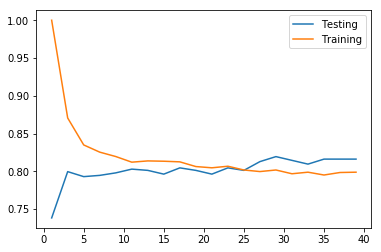

In [54]:
ns = []
test_scores = []
train_scores = []
for n in range(1,40,2):
    classifier = KNeighborsClassifier(n_neighbors=n)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)  
    training = classifier.score(X_train, y_train)
    testing  = classifier.score(X_test,  y_test)
    
    ns.append(n)
    test_scores.append(testing)
    train_scores.append(training)
plt.plot(ns,test_scores,label="Testing")
plt.plot(ns, train_scores,label="Training")
plt.legend()
plt.show()

The best k for KNN seems to be when $k=11$ as both the training and testing accuracies reach a monotonic state here.